# Case Study: Fintech Company - Credit Risk Modelling

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('credit_risk_dataset.csv')

In [3]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [4]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [7]:
df['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [8]:
df['loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [9]:
df['loan_grade'].unique()

array(['D', 'B', 'C', 'A', 'E', 'F', 'G'], dtype=object)

## 1. Data Exploration and Preprocessing

In [10]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [11]:
df.corr()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.173202,0.163106,0.050787,0.012580,-0.021629,-0.042411,0.859133
person_income,0.173202,1.000000,0.134268,0.266820,0.000792,-0.144449,-0.254471,0.117987
person_emp_length,0.163106,0.134268,1.000000,0.113082,-0.056405,-0.082489,-0.054111,0.144699
loan_amnt,0.050787,0.266820,0.113082,1.000000,0.146813,0.105376,0.572612,0.041967
loan_int_rate,0.012580,0.000792,-0.056405,0.146813,1.000000,0.335133,0.120314,0.016696
loan_status,-0.021629,-0.144449,-0.082489,0.105376,0.335133,1.000000,0.379366,-0.015529
loan_percent_income,-0.042411,-0.254471,-0.054111,0.572612,0.120314,0.379366,1.000000,-0.031690
cb_person_cred_hist_length,0.859133,0.117987,0.144699,0.041967,0.016696,-0.015529,-0.031690,1.000000


In [12]:
#The dataset had missing values and outliers so filled those with the mean and median.

In [13]:
person_emp_median=df['person_emp_length'].median()
df['person_emp_length'].fillna(person_emp_median,inplace=True)

In [14]:
loan_int_mean=df['loan_int_rate'].mean()
df['loan_int_rate'].fillna(loan_int_mean,inplace=True)

In [15]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


##### EDA

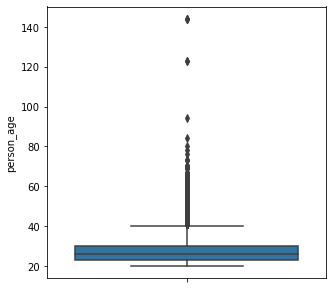

In [17]:
plt.figure(figsize=(5,5))
boxplot = sns.boxplot(y="person_age", data=df)

In [18]:
df['person_age'].max()

144

In [19]:
#Excluding the age above 95,since it is not required for the analysis
df=df[df['person_age'] <= 95]

In [20]:
df['person_age'].max()

94

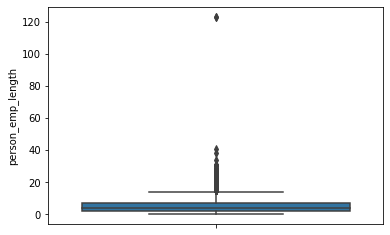

In [21]:
boxplot = sns.boxplot(y="person_emp_length", data=df)

In [22]:
df['person_emp_length'].max()

123.0

In [23]:
#since the employment length(years) cannot be more than individuals age
df = df.loc[df['person_emp_length'] < df['person_age'] - 10]

In [24]:
df['person_emp_length'].max()

41.0

Text(0.5, 1.0, 'Correlation Matrix')

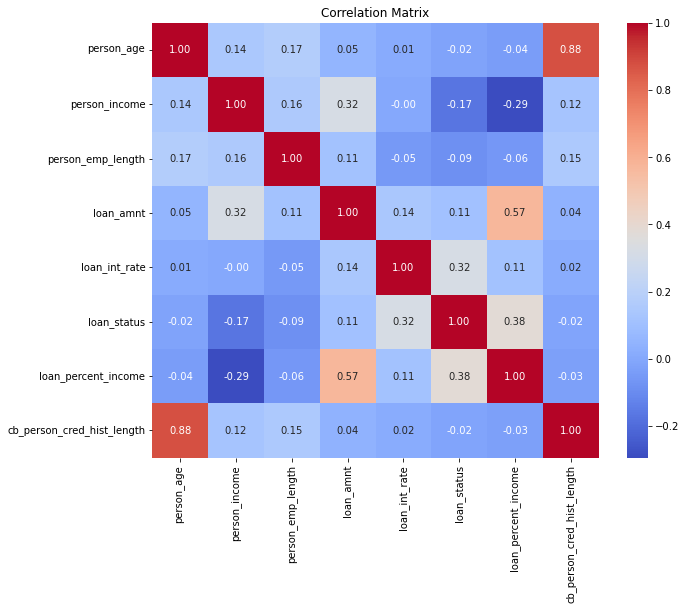

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")

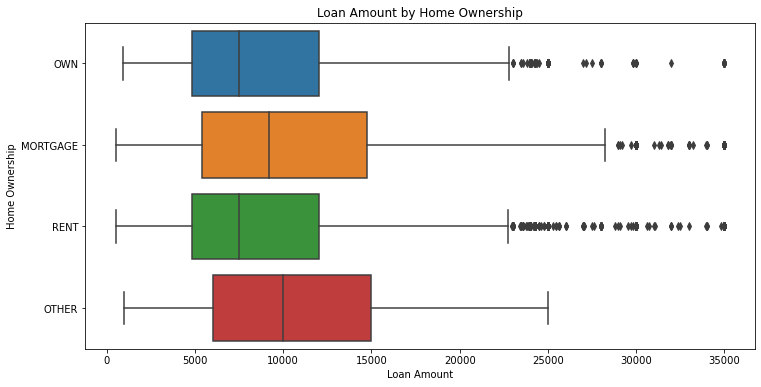

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['loan_amnt'], y=df['person_home_ownership'])
plt.title('Loan Amount by Home Ownership')
plt.xlabel('Loan Amount')
plt.ylabel('Home Ownership')
plt.show()

Text(0.5, 1.0, 'Home ownership')

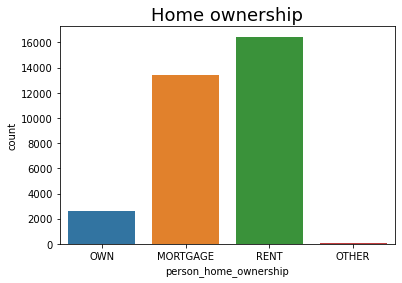

In [27]:
sns.countplot(x=df['person_home_ownership'])
plt.title('Home ownership', fontsize=18)

c:\Users\Arya Surendran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


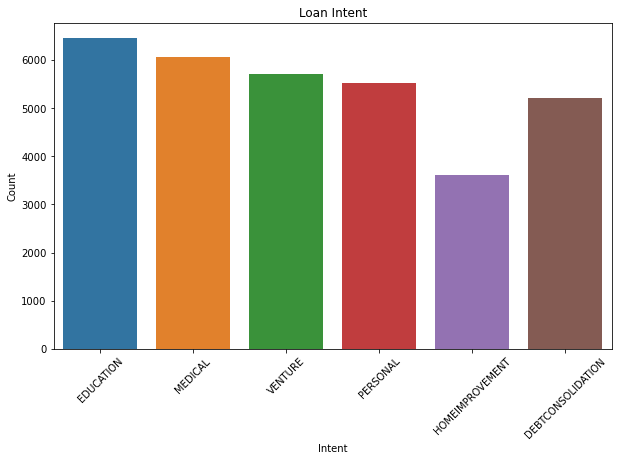

In [28]:
# Count plot of 'loan_intent'
plt.figure(figsize=(10, 6))
sns.countplot(df['loan_intent'])
plt.title('Loan Intent')
plt.xlabel('Intent')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

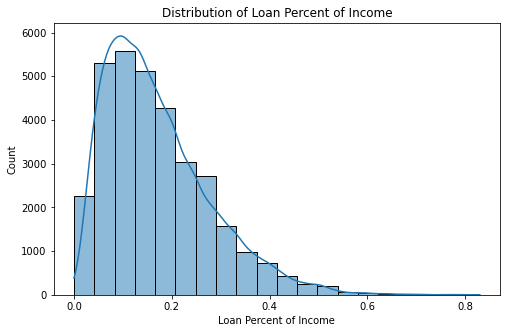

In [29]:
#Count Plot of 'cb_person_default_on_file' by 'loan_grade'
plt.figure(figsize=(8, 5))
sns.histplot(df['loan_percent_income'], bins=20, kde=True)
plt.title('Distribution of Loan Percent of Income')
plt.xlabel('Loan Percent of Income')
plt.ylabel('Count')
plt.show()

In [30]:
#Performing label encoding to convert the categorical data into numerical value.
label_encoder = LabelEncoder()
df['person_home_ownership'] = label_encoder.fit_transform(df['person_home_ownership'])
df['loan_intent'] = label_encoder.fit_transform(df['loan_intent'])
df['loan_grade'] = label_encoder.fit_transform(df['loan_grade'])
df['cb_person_default_on_file'] = label_encoder.fit_transform(df['cb_person_default_on_file'])

In [31]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,0,3
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,1,4
5,21,9900,2,2.0,5,0,2500,7.14,1,0.25,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,0,1.0,4,2,5800,13.16,0,0.11,0,30
32577,54,120000,0,4.0,4,0,17625,7.49,0,0.15,0,19
32578,65,76000,3,3.0,2,1,35000,10.99,1,0.46,0,28
32579,56,150000,0,5.0,4,1,15000,11.48,0,0.10,0,26


## 2. Feature Selection and Engineering

In [32]:
# This represents the proportion of a person's income that is committed to repaying the loan.
#A higher loan-to-income ratio suggests that a larger portion of the person's income is dedicated to loan repayment. 
df['loan_to_income'] = df['loan_amnt'] / df['person_income']
df['loan_to_income']

1        0.104167
2        0.572917
3        0.534351
4        0.643382
5        0.252525
           ...   
32576    0.109434
32577    0.146875
32578    0.460526
32579    0.100000
32580    0.154167
Name: loan_to_income, Length: 32574, dtype: float64

In [33]:
#This measures the relationship between the borrower's employment history and the loan size.
#A higher ratio suggests that the borrower has a longer employment history relative to the loan amount. 
df['loan_to_emp_length_ratio'] =  df['person_emp_length']/ df['loan_amnt'] 
df['loan_to_emp_length_ratio']

1        0.005000
2        0.000182
3        0.000114
4        0.000229
5        0.000800
           ...   
32576    0.000172
32577    0.000227
32578    0.000086
32579    0.000333
32580    0.000309
Name: loan_to_emp_length_ratio, Length: 32574, dtype: float64

In [34]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_to_income,loan_to_emp_length_ratio
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2,0.104167,0.005000
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,0,3,0.572917,0.000182
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2,0.534351,0.000114
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,1,4,0.643382,0.000229
5,21,9900,2,2.0,5,0,2500,7.14,1,0.25,0,2,0.252525,0.000800


In [35]:
x=df.drop(['loan_status'],axis=1)
y=df['loan_status']

## 3. Model Building

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, accuracy_score
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=12)

#### Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

# Create and train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

LogisticRegression()

In [38]:
# Make predictions on the test set
logistic_predictions = logistic_model.predict(x_test)

In [39]:
# Evaluate the model
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
print("Logistic Regression Accuracy:", logistic_accuracy)
print(classification_report(y_test, logistic_predictions))


Logistic Regression Accuracy: 0.8096699923254029
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      5136
           1       0.72      0.17      0.27      1379

    accuracy                           0.81      6515
   macro avg       0.77      0.57      0.58      6515
weighted avg       0.79      0.81      0.76      6515



#### Gradient Boosting

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_boosting_model = GradientBoostingClassifier(random_state=42)
gradient_boosting_model.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

In [41]:
gb_pred = gradient_boosting_model.predict(x_test)

In [42]:
gb_acc = accuracy_score(y_test, gb_pred)
print("Gradient Boosting Accuracy:", gb_acc)
print(classification_report(y_test, gb_pred))

Gradient Boosting Accuracy: 0.928472755180353
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5136
           1       0.94      0.71      0.81      1379

    accuracy                           0.93      6515
   macro avg       0.93      0.85      0.88      6515
weighted avg       0.93      0.93      0.92      6515



#### Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
# Training the Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [44]:
# Making predictions
y_pred = clf.predict(x_test)

In [45]:
# Evaluation metrics

In [46]:
'''Precision measures the proportion of true positive predictions among all positive predictions.It is essential in credit risk
   assessment to minimize false positives.'''
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

Precision: 0.96


In [47]:
'''Recall measures the proportion of true positive predictions among all actual positives. It's essential to capture as 
   many true positives (actual defaulters) as possible.'''

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

Recall: 0.70


In [48]:
'''f1 is the harmonic mean of precision and recall, providing a balance between the two metrics.'''
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.2f}")

F1-Score: 0.81


In [49]:
rfc_acc=accuracy_score(y_test,y_pred)
class_report = classification_report(y_test, y_pred)
print('Random Forest Classifier Accuracy: ',rfc_acc)
print('Classification Report:\n', class_report)

Random Forest Classifier Accuracy:  0.9306216423637759
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      5136
           1       0.96      0.70      0.81      1379

    accuracy                           0.93      6515
   macro avg       0.94      0.85      0.88      6515
weighted avg       0.93      0.93      0.93      6515



## 4. Model Optimisation and Tuning

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
from sklearn.model_selection import GridSearchCV
# Define hyperparameters and their possible values for grid search
param_grid = {
'n_estimators': [50, 100, 150],
'max_depth': [None, 10, 20],
'min_samples_split': [2, 5, 10]
}
# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid,cv=5)
grid_search.fit(x_train, y_train)
# Best hyperparameters
best_params = grid_search.best_params_
print('Best Hyperparameters:', best_params)
# Use the best model for predictions
best_rf_classifier = grid_search.best_estimator_
predictions = best_rf_classifier.predict(x_test)

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}


## 5. Model Interpretation and Recommendations 

In [52]:
'''The Random Forest model considers a combination of features to make predictions, and each tree in the forest contributes 
   to the final prediction.
Challenges:
1. It is difficult to understand the specific rules or decisions made by individual trees, especially when there are a 
   large number of trees. 
2. It provides feature importances, but it does not provide insight into how a specific tree arrived at a particular prediction.

SyntaxError: EOF while scanning triple-quoted string literal (Temp/ipykernel_12624/2448990196.py, line 6)

In [ ]:
#RECOMMENDATIONS
'''
1. Track and reduce the overall credit exposure to high-risk borrowers.This can be done by establishing credit limitations 
    for each borrower based on their risk profile.
2. Identify borrowers who may be at danger of default based on changes in their financial behavior or circumstances by 
   implementing early warning systems.
3. Evaluate the model's performance on a regular basis, making adjustments as needed to make it more responsive to shifting 
   market conditions and borrower behavior.
